In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 13.4 MB/s eta 0:00:00


In [2]:
import PIL
from PIL import Image

def image_grid(imgs, rows, cols):
    """
    This function takes a list of images and creates a grid of images from them.

    Args:
    imgs (list): List of images to be used in the grid.
    rows (int): Number of rows in the grid.

    Returns:
    grid (Image): The grid of images.
    """

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

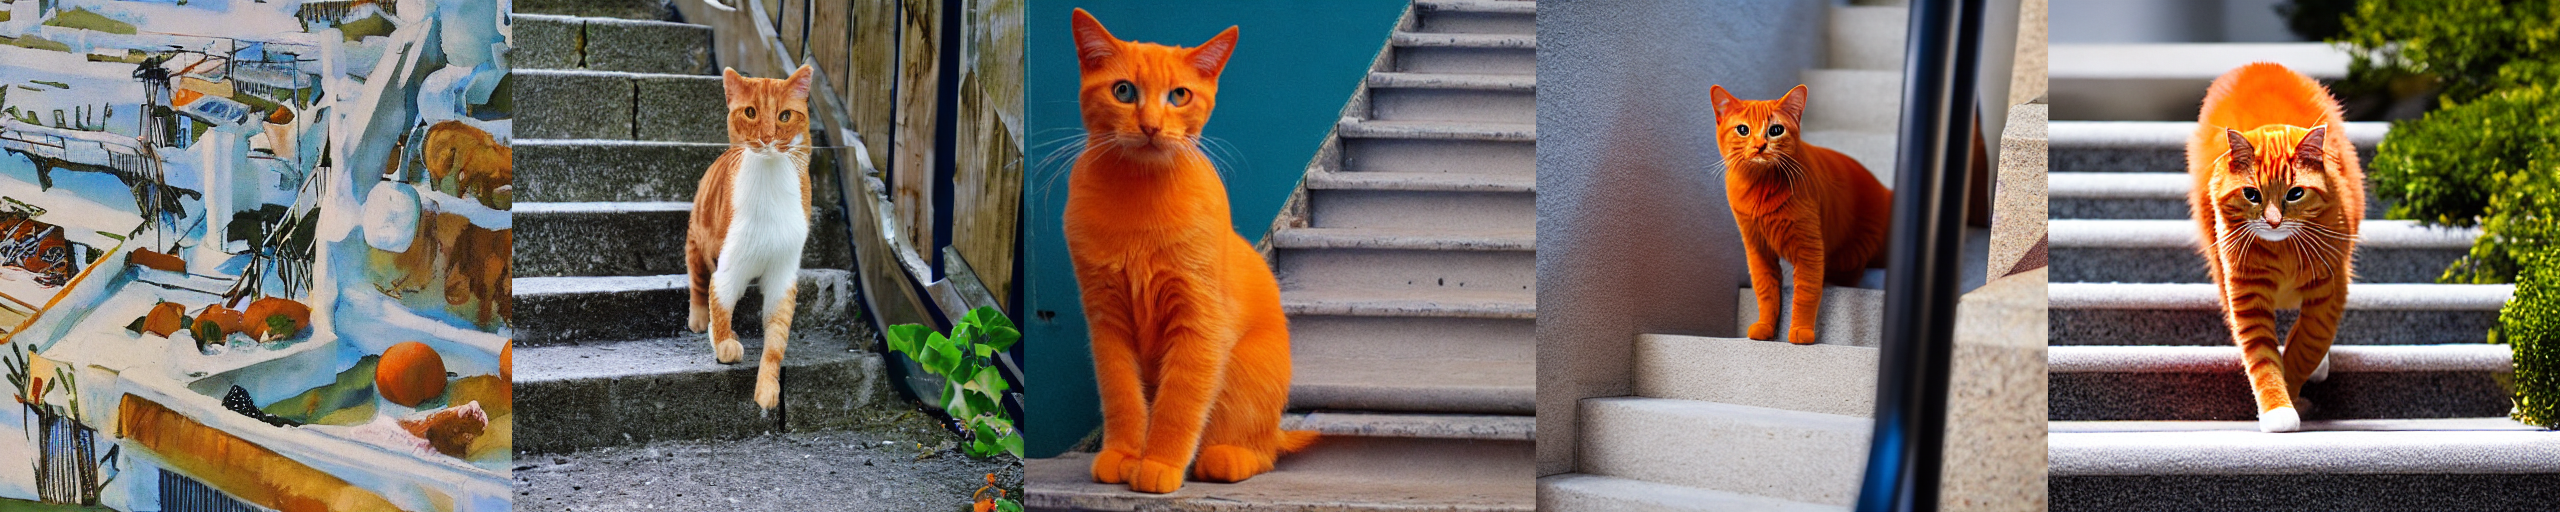

In [7]:
import torch
from diffusers import StableDiffusionPipeline

def generate_images_with_different_guidance_scales(prompt, negative_prompt, guidance_scales, seed, device):

    pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to(device)

    generator = torch.Generator(device=device).manual_seed(seed)

    images = []
    for guidance_scale in guidance_scales:
        image = pipeline(prompt=prompt, negative_prompt=negative_prompt, guidance_scale=guidance_scale, generator=generator).images[0]
        images.append(image)

    grid = image_grid(images, 1, len(guidance_scales))

    return grid


prompt = "An orange cat blue-eyed, going up the stairs, modern art"
negative_prompt = "ugly, distorted face, poor details, deformed, bad art, poorly drawn feet, poorly drawn face, watermark, text, signature, missing arms, missing legs"
guidance_scales = [0.5, 2.5, 5, 7.5, 10.5]
seed = 30
device = "cuda"

grid = generate_images_with_different_guidance_scales(prompt, negative_prompt, guidance_scales, seed, device)
#grid.save("result.png")

grid